In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import math
import random
import functions
import LNL_model_modified
import matplotlib.pyplot as plt
from RBF import RBF
from sklearn.neural_network import MLPRegressor
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
import seaborn as sns
sns.set()
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 16, 8

# Pre processing

In [2]:
df = pd.read_csv('beer.csv')
data = df.iloc[:, -1].values

ent = 8

serie_normal = functions.normalizar_serie(data)
serie_lags = functions.gerar_janelas(tam_janela = ent, serie = serie_normal) #Sem normalizar
X_train, y_train, X_test, y_test, X_val, y_val = functions.split_serie_with_lags(serie = serie_lags, perc_train = 0.7, perc_val = 0.15)

Particao de Treinamento: 0 100
Particao de Validacao: 100 121
Particao de Teste: 121 144


# Gridsearch for best model

In [3]:
# MPSO Parameters
C1 = [2.0, 3.0, 4.0, 5.0]
C2 = [2.0, 3.0, 4.0, 5.0]
W = [0.4, 0.5, 0.6, 0.7, 0.8]
epochs = 8000
n_particles = 50

/home/jvcm/time-series/hybrid_system/functions.py:97: RuntimeWarning: overflow encountered in exp
  sigm = 1. / (1. + np.exp(-x))


-----------------------------------------------------------------------
Validation MSE = 0.01601288827779102 Particle: [-0.43451423 -0.54783592  1.15416652  2.61494366 -1.60764973 -0.37063428
 -4.13752411  0.57541864  2.04038223  0.64248166  0.96597176  2.22941955
 -0.27118882  3.27256033  2.09726006 -0.00549314  1.32437415  3.04061294
  0.16682861  4.03038733  3.34865096  1.15245712  0.31257116  0.00732295
  1.69485583 -0.12069927  2.99345544 -0.8521423   1.26292624  0.655263
  1.40995384  2.32338129  0.56436616  0.39650259 -1.16687954  1.69244143
  0.44521663 -1.80613245]


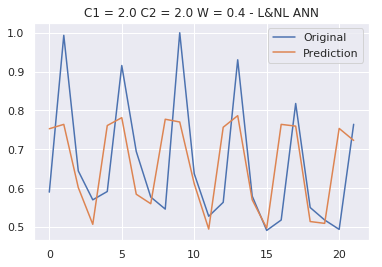

Test MSE = 0.02022078588502899
-----------------------------------------------------------------------
Validation MSE = 0.010397603644320904 Particle: [ 2.58429817 -1.94207136  0.29680121  0.61340021  2.68977039  1.48316574
  1.14052966  1.57092208 -1.09307139  1.11816473 -2.47826898  0.50870804
 -0.28184655  1.20165112  1.0655371   0.86231012 -1.84778592  1.21071197
 -2.10235553  4.05466409 -0.0101162   2.89710278 -2.47081303  1.40350278
 -0.88829438  0.77966693  1.50887709 -0.17445948  0.24855573  0.85335655
  4.32622549 -1.2883241   4.26420367 -2.83275198  1.66821009  1.14554617
  0.50980764 -5.16178315]


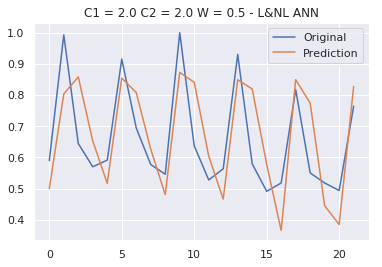

Test MSE = 0.016628584248193835
-----------------------------------------------------------------------
Validation MSE = 0.0054470187188396975 Particle: [ 0.03980034 -0.36737848 -0.37194286 -0.0394576   2.5814775   0.84937947
 -0.0977774   1.01519707  1.1230876   0.96898929  2.22277549  1.11464686
  0.30109348  1.60764265  0.47490046  2.82490718  0.29589499  1.54919203
 -0.77030581  0.43856706 -0.17370147  1.13849426  1.28187118 -2.47012401
  0.30031013  1.70794297 -1.32163744 -0.44033983  0.1456091   0.70928173
 -0.41387    -0.1450558   0.18189142 -1.01161852 -0.39069593  0.88568184
  1.71984377 -1.4616036 ]


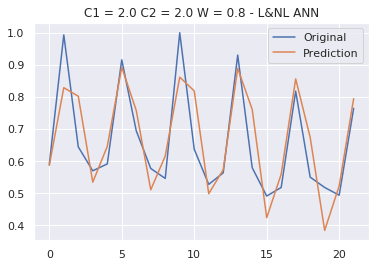

Test MSE = 0.009107151831734809
-----------------------------------------------------------------------
Validation MSE = 0.0048863668557776446 Particle: [ 2.37768227  0.39095354  0.88834584  1.6260947   3.18174182  2.45364748
  0.8781769   0.5244138  -1.85788563  0.92469106  0.3451848   2.13691522
 -0.13060194  1.48642109 -0.11619408 -0.7345438   3.5082457  -1.4984909
 -0.05935593  1.07776008  2.61208465 -2.81236291 -0.12506528 -1.72596214
  0.55201699  0.53289556 -2.4960166  -1.86831391  0.80115765  1.38258736
  3.19137204 -0.33942152  0.84794862  1.37424967 -0.94575582  1.17585617
  0.31506535  0.93692499]


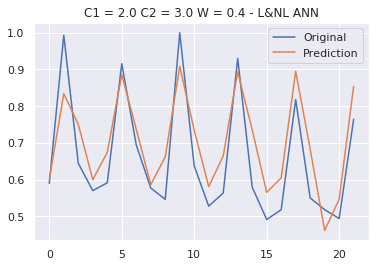

Test MSE = 0.0076372720896107135
-----------------------------------------------------------------------
Validation MSE = 0.004605441366807116 Particle: [ 2.1314206  -0.45425652  0.52675639  0.13614287  2.13642786  1.30427739
  0.94847829  2.64069491  1.19419874 -0.41638847  3.02462785  2.78091148
  1.39051126 -0.73948765 -0.50359377 -1.78884943  1.11939041  0.62622939
  0.96367965  0.75744201  0.03363422  1.12445446  1.11926871  0.07217163
  0.54874144  0.29600817  1.35890915  0.68693965 -0.31052837  0.90189786
  1.34390801 -0.90448797 -1.08450547  1.93840286 -2.36265943  2.65612571
  1.61866759 -0.73333332]


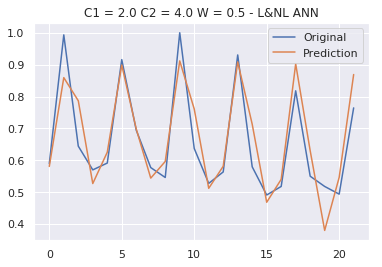

Test MSE = 0.006110694253489379


/home/jvcm/tsenv/lib/python3.5/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/jvcm/time-series/hybrid_system/LNL_model_modified.py:34: RuntimeWarning: overflow encountered in double_scalars
  net3 = w3[0]*f1 + w3[1]*f2 + b3
/home/jvcm/time-series/hybrid_system/LNL_model_modified.py:30: RuntimeWarning: overflow encountered in multiply
  net2 = np.prod(X*w2 + b2)


Error in parameters: C1: 2.0 C2: 5.0 W: 0.5
Error in parameters: C1: 2.0 C2: 5.0 W: 0.8
Error in parameters: C1: 3.0 C2: 5.0 W: 0.6
Error in parameters: C1: 3.0 C2: 5.0 W: 0.7
Error in parameters: C1: 3.0 C2: 5.0 W: 0.8
-----------------------------------------------------------------------
Validation MSE = 0.004428976136142732 Particle: [ 2.50422062 -2.39761559 -0.61566518  1.02169141  2.98322461  2.56194091
  0.06633218 -0.63967523  2.14563011 -0.14475688  2.02516519  1.42345655
  1.01324087 -0.11773241 -3.14245038 -0.00898709  5.02085849  3.89123851
  0.87548104  0.63160181 -0.15694528  2.12371471 -1.11634568  0.31537702
  1.16371623  1.81947161 -1.0832345   1.46882287  1.04026063 -0.67424654
 -0.0476475  -1.38603454 -0.02029194 -0.42544494  1.50955024  0.4628815
 -2.22690036 -1.04400984]


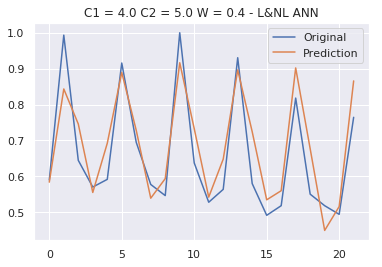

Test MSE = 0.0061943060122785325
Error in parameters: C1: 4.0 C2: 5.0 W: 0.6
Error in parameters: C1: 4.0 C2: 5.0 W: 0.7
Error in parameters: C1: 4.0 C2: 5.0 W: 0.8
-----------------------------------------------------------------------
Validation MSE = 0.0035091581687627053 Particle: [ 2.7653164  -1.51149238 -1.34584203 -1.70569313  2.51733746  1.63040868
  1.16444788  1.00102715 -1.71423875 -2.44413547  4.03135511 -2.22923758
  2.76111994  0.40874037 -1.02536371  1.65959691  0.37828203  0.05673576
  2.05751258 -0.56216218  0.88137304  1.36320374 -1.95079049  1.19992684
 -1.41872516  2.06430169  2.78056853  0.2956839  -0.46524962 -3.89363256
  4.79495407 -1.89724009  0.43252884 -1.78320296  2.57973045  0.42655162
  0.19639537 -1.99478389]


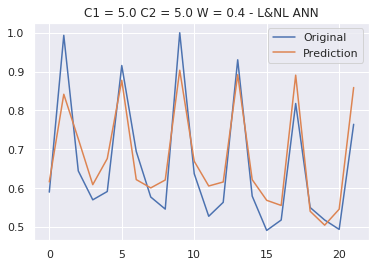

Test MSE = 0.004504727350273386
Error in parameters: C1: 5.0 C2: 5.0 W: 0.6
Error in parameters: C1: 5.0 C2: 5.0 W: 0.7
Error in parameters: C1: 5.0 C2: 5.0 W: 0.8


In [4]:
#Gridsearch
best_mse = np.Inf
for i, c1 in enumerate(C1):
    for j, c2 in enumerate(C2):
        for k, w in enumerate(W):
            model = LNL_model_modified.LNL_ANN(m = ent, z = 1)
            try:
                model.fit_MPSO(X_train, y_train, d= n_particles,
                           c1i = c1, c1f = 0.8, c2i = c2, c2f = 0.8,
                           w1 = 0.3, w2 = w, maxt = epochs)
            except:
                print("Error in parameters: C1:",c1,"C2:",c2, "W:",w)
                continue
            val_pred = model.predict(X_val)
            mse = functions.mean_squared_error(y_val, val_pred)
            if mse < best_mse:
                print('-----------------------------------------------------------------------')
                best_mse = mse
                best_model = model
                print('Validation MSE =', best_mse, 'Particle:', best_model.weight)
                best_params = [c1, c2, w]
                
                # Setting last portion of validation data to predict
                model.setFinalData(X_val)
                
                # Ready to predict...
                y_pred = best_model.predict(X_test)
                
                # Plot
                plt.plot(y_test, label = 'Original')
                plt.plot(y_pred, label = 'Prediction')
                plt.title('C1 = {} C2 = {} W = {} - L&NL ANN' .format(c1, c2, w))
                plt.legend()
                plt.show()
                print('Test MSE =', functions.mean_squared_error(y_test, y_pred))